In [ ]:
#importing the needed libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#reading/opening the csv file so work can be done on it
tweetsDf= pd.read_csv('Tweets.csv')

In [ ]:
#shows all the columns in the data pre pre data cleaning
tweetsDf.columns

In [ ]:
#shows the first five rows of the untouched data
tweetsDf.head()

In [ ]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

In [ ]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

In [ ]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [ ]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [ ]:
mask = tweetsDf['negativereason'].str.contains("Can't Tell", na=False)
print(len(tweetsDf[mask]), 'rows dropped')
tweetsDf = tweetsDf.drop(tweetsDf[mask].index)

In [ ]:
tweetsDf.head(10)

In [ ]:
print(tweetsDf.isnull().sum())

# Check for empty spaces
for col in tweetsDf.columns:
    if tweetsDf[col].dtype == object:
        print(f"{col}: {tweetsDf[col].str.isspace().sum()}")

In [ ]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print('Airline_Conf_Bucket:\n',(tweetsDf['Airline_Conf_Bucket']).head())

In [ ]:
bin = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tweetsDf['NegReason_Conf_Bucket']= pd.cut(tweetsDf['negativereason_confidence'], bin)

print('NegReason_Conf_Bucket:\n',(tweetsDf['NegReason_Conf_Bucket']).head())

In [ ]:
# group data by negative reason and compute median confidence(Post Col drops)
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [ ]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','airline_sentiment' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False,)
plt.title('Airline Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

In [ ]:
tweetsDf=tweetsDf[tweetsDf['negativereason_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','negativereason' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Tweet Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

4. start presentation work
5.go straight into alg (TBD)

In [ ]:
# filter dataframe to only include rows with specific airlines
airlines = ['Delta', 'United', 'American']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

In [ ]:
# filter dataframe to only include rows with specific airlines
airlines = ['Southwest', 'Virgin America', 'US Airways']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

In [ ]:
# create pivot table
pivot_table = tweetsDf.pivot_table(index='airline', columns='negativereason', values='negativereason_confidence')

# create heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# set plot title and axis labels
plt.title('Airline Sentiment by Negative Reason')
plt.xlabel('Negative Reason')
plt.ylabel('Airline')
plt.show()

# K-Means ALG has been choosen!

After using K-means clustering, we can use the cluster labels assigned to each data point to make predictions. For example, if we have a new data point and you want to predict which cluster it belongs to, we can use the K-means model to predict its cluster label based on its features.

Regarding our data, since we have already stripped out the positive and neutral sentiments and only have negative sentiments along with their reasons and confidence scores, we can use this data to perform K-means clustering. We can treat each negative reason as a feature, and each row in our data as a data point with a corresponding confidence score. We can then perform K-means clustering on this data to identify common negative reasons in the airline industry and their likelihood of occurring again based on the confidence scores.


C:\Users\pdmil\AppData\Local\Temp\ipykernel_11352\3725332114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'negativereason_confidence'] = tweetsDf['negativereason_confidence'].median()
c:\Users\pdmil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


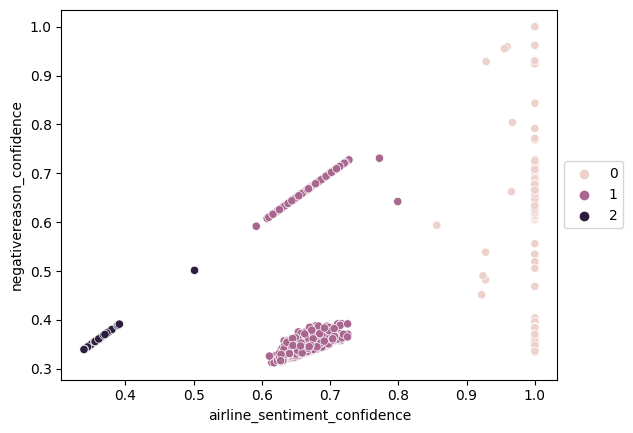

In [41]:
# Select the relevant features for clustering
X = tweetsDf[['airline_sentiment_confidence']]
X.loc[:, 'negativereason_confidence'] = tweetsDf['negativereason_confidence'].median()

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Visualize the results using a scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster assignments to the dataframe
tweetsDf['cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Select the features you want to use for clustering
X = tweetsDf[['airline_sentiment_confidence', 'negativereason_confidence']]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Fit the KMeans model to the training data
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X_train)

# Predict the clusters for the test data
test_clusters = kmeans.predict(X_test)

# Evaluate the clustering performance using a metric such as silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_test, test_clusters)

'''
the number generated below basically says that the k-means clustering alg ID the correct cluster 
82% of the time.
'''

0.8186956029225846

In [40]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score

# Load the dataset
tweetsDf= pd.read_csv('Tweets.csv')

# Filter out positive and neutral tweets
tweetsDf = tweetsDf[tweetsDf['airline_sentiment'] == 'negative']

# Extract the text data
text_data = tweetsDf['negativereason']

# Convert the tweets into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Train a one-class SVM model
clf = OneClassSVM()
clf.fit(X)

# Make predictions on the training set
y_pred_train = clf.predict(X)

# Compute the f1 score and accuracy on the training set
f1_train = f1_score([-1] * len(X.toarray()), y_pred_train, pos_label=-1)
acc_train = accuracy_score([-1] * len(X.toarray()), y_pred_train)

print('Training f1 score:', f1_train)
print('Training accuracy:', acc_train)


Training f1 score: 0.5529365392195507
Training accuracy: 0.3821093920244062
